# Modeling the Worst: A Zombie and Ebola outbreak
Jahad Ahmed Hamidi, Ruhan Reza, Stian Salte

## Abstract

## Introduction

## Exercise 5 -  Ebola epidemic in West Africa

### Task 1

We start by plotting the outbreak data of ebola cases in Guinea, Liberia and Sierra Leone

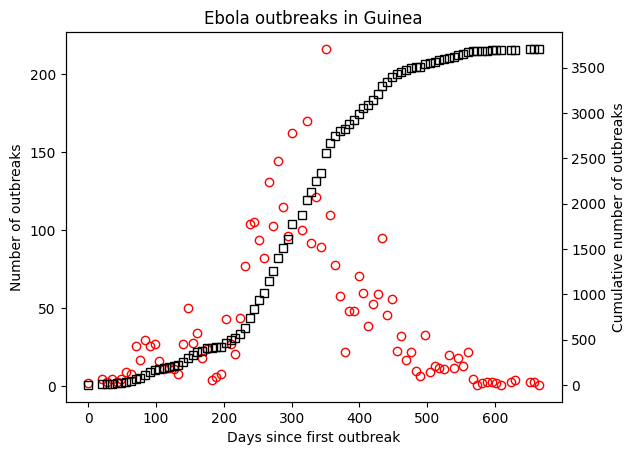

In [91]:
# Making a figure for Guinea
import pandas as pd
import matplotlib.pyplot as plt

def plot_outbreak(file, country):
    df = pd.read_csv(file, sep="\t")

    df["Cumulative Cases"] = df["NumOutbreaks"].cumsum()

    _, ax1 = plt.subplots()
    plt.title(f"Ebola outbreaks in {country}")
    ax1.set_xlabel("Days since first outbreak")
    ax1.set_ylabel("Number of outbreaks")
    ax2 = ax1.twinx()
    ax2.set_ylabel("Cumulative number of outbreaks")
    

    ax1.plot(df["Days"], df["NumOutbreaks"], marker="o", linestyle="None", fillstyle="none", color="red")
    ax2.plot(df["Days"], df["Cumulative Cases"], marker="s", linestyle="None", fillstyle="none", color="black")

plot_outbreak("./data/ebola_cases_guinea.dat", "Guinea")


We do the same for Liberia:

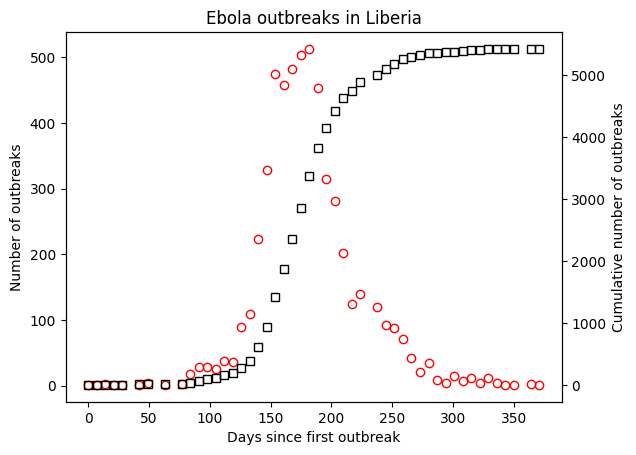

In [92]:
#Making a figure for Liberia
plot_outbreak("./data/ebola_cases_liberia.dat", "Liberia")

And finally for Sierra Leone:

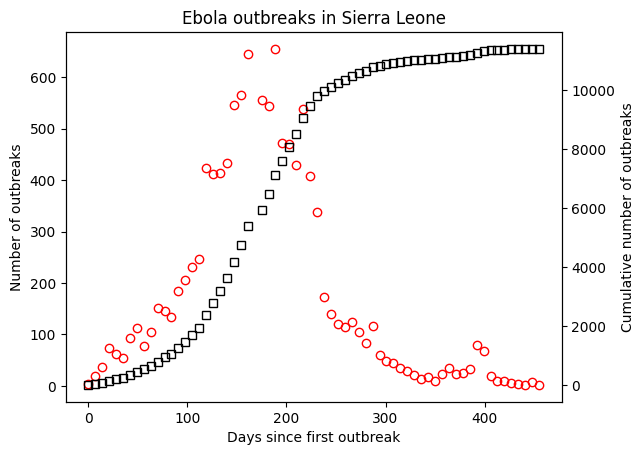

In [93]:
#Making a figure for Sierra Leone
plot_outbreak("./data/ebola_cases_sierra_leone.dat", "Sierra Leone")

## Task 2

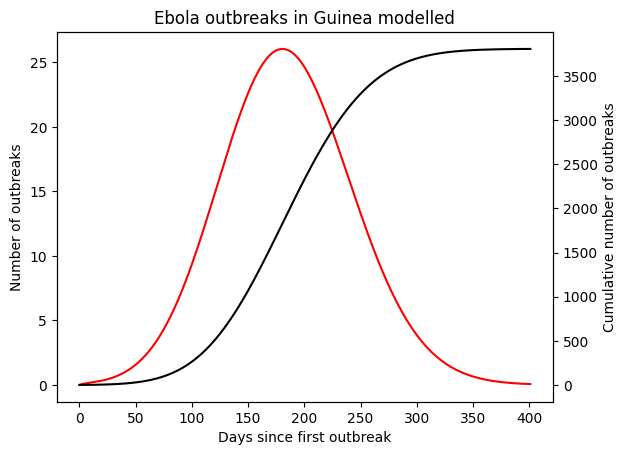

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

df = pd.read_csv("./data/ebola_cases_guinea.dat", sep="\t")

df["Cumulative Cases"] = df["NumOutbreaks"].cumsum()

def step(dt, f, t,c_old, *args, **kwargs):
    k1 = np.array(dt*f(t, c_old, *args, **kwargs))
    return dt*f(t+dt*0.5, c_old + 0.5*k1, *args, **kwargs)

def ode_solver(t0, t_final, c0, dt, f, *args, **kwargs):
    """
    ODE solver using RK2

    Input
    -----
    t0: float, starting time
    t_final: float, end time
    c0: float, initial condition
    dt: float, step size
    f: ode function

    Output
    -----
    t, c
    """
    N = int(t_final/dt) + 1  
    c = []
    t = []
    c.append(c0) 
    t.append(t0)
    for i in range(N):
        c_old = c[-1]
        c_old = np.array(c_old)
        t_old = t[-1]
        c.append(c_old + step(dt, f, t_old, c_old, *args, **kwargs)) 
        t.append(t[-1]+dt)
    return np.array(t), np.array(c)

def ebola(t, c, beta0, lam, sigma=1/9.7, gamma=1/7, N=1e7):
    S, E, Z, R = c
    beta_t = beta0 * np.exp(-lam * t)
    dS = -beta_t * S * Z / N
    dE = beta_t * S * Z / N - sigma * E
    dZ = sigma * E - gamma * Z
    dR = gamma * Z
    return np.array([dS, dE, dZ, dR])

t0 = 0
t_final = 400
dt = 1
# Experimenting with theese parameters
beta0 = 0.351
lam = 0.0049

t, c = ode_solver(t0=t0, t_final=t_final, c0=[1e7-1, 0, 1, 0], dt=dt, f=ebola, beta0=beta0, lam=lam)

S, E, Z, R = c.T
cumulative_cases = Z + R
new_outbreaks = (1/9.7) * E


_, ax1 = plt.subplots()
plt.title(f"Ebola outbreaks in Guinea modelled")
ax1.set_xlabel("Days since first outbreak")
ax1.set_ylabel("Number of outbreaks")
ax2 = ax1.twinx()
ax2.set_ylabel("Cumulative number of outbreaks")


ax1.plot(t, new_outbreaks, fillstyle="none", color="red")
ax2.plot(t, cumulative_cases, fillstyle="none", color="black")

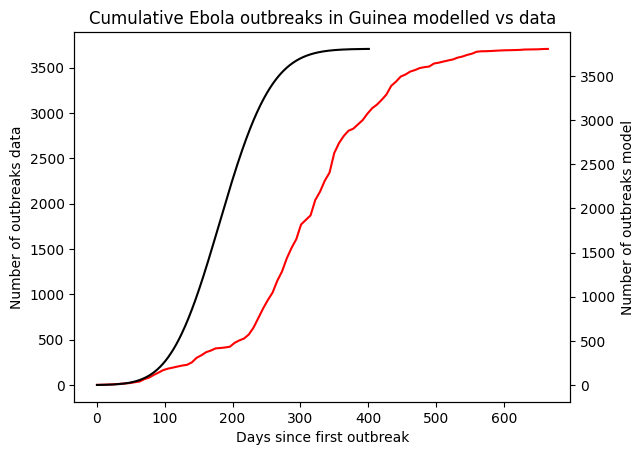

In [95]:
_, ax1 = plt.subplots()
plt.title(f"Cumulative Ebola outbreaks in Guinea modelled vs data")
ax1.set_xlabel("Days since first outbreak")
ax1.set_ylabel("Number of outbreaks data")
ax2 = ax1.twinx()
ax2.set_ylabel("Number of outbreaks model")


ax1.plot(df["Days"], df["Cumulative Cases"], fillstyle="none", color="red")
ax2.plot(t, cumulative_cases, fillstyle="none", color="black")

The comparsion between model and data shows that the model fits the cumulative number of outbreaks quite well. However, we see that the model starts growing much earlier than the data. We will explore this by comparing number of new cases:

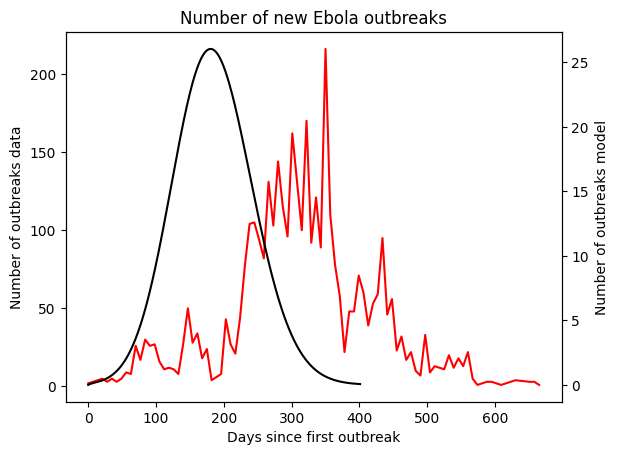

In [96]:
_, ax1 = plt.subplots()
plt.title(f"Number of new Ebola outbreaks")
ax1.set_xlabel("Days since first outbreak")
ax1.set_ylabel("Number of outbreaks data")
ax2 = ax1.twinx()
ax2.set_ylabel("Number of outbreaks model")


ax1.plot(df["Days"], df["NumOutbreaks"], fillstyle="none", color="red")
ax2.plot(t, new_outbreaks, fillstyle="none", color="black")

We observe from the comparison between the model and data that the number of new outbreaks are vastly different. This is most likely to the reporting of new cases in the data happens every week, while the model records new cases each day.

## Conclusion & Discussion

## Self-reflections